In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [43]:
df = pd.read_csv('/home/ro/PycharmProjects/My/Data setai/kickstarter-projects/ks-projects-201801.csv')

In [25]:
df.shape

(378661, 15)

In [26]:
df.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [27]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [28]:
#checking for missing data
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [29]:
#drop rows with missing values
df.dropna(axis = 0, inplace = True)

In [30]:
#lets check how many projects are successufl

def success_rate (df, state):
    x = pd.concat([df[state].value_counts(normalize = True) * 100,
                  df[state].value_counts(normalize = False)], axis = 1)
    x = round(x, 2) 
    x.columns = ['% of projects', 'count']
    return x

In [31]:
print(success_rate(df, 'state'))

            % of projects   count
failed              52.72  197611
successful          35.71  133851
canceled            10.34   38757
live                 0.75    2798
suspended            0.49    1843


In [35]:
df.query("state in ['failed', 'successful']", inplace = True)

In [11]:
#removing 'canceled', 'live', 'suspended' projects from data Frame
df.query("state in ['failed', 'successful']", inplace = True)

In [12]:
success_rate(df, 'state')

,% of projects,count
failed,59.62,197611
successful,40.38,133851


In [14]:
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [16]:
#Lets find which of main categories is most popular
most_succes_main_category = success_rate(df, 'main_category')
most_succes_main_category

,% of projects,count
Film & Video,17.05,56503
Music,13.82,45801
Publishing,10.68,35413
Games,8.60,28520
Technology,8.16,27046
Art,7.74,25640
Design,7.65,25363
Food,6.65,22054
Fashion,5.97,19774
Theater,3.09,10242


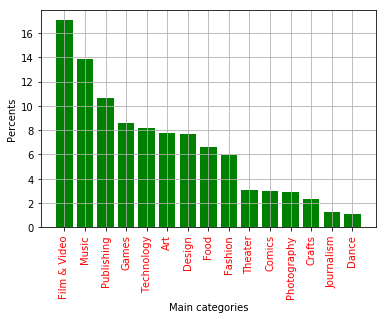

In [17]:
plt.bar(most_succes_main_category.index, most_succes_main_category['% of projects'], color = 'g')
plt.xlabel('Main categories')
plt.ylabel('Percents')
plt.xticks(np.arange(15), most_succes_main_category.index, rotation=90, color = 'r')
plt.grid(True)

In [18]:
#Lets find 10 countries with most projects
most_projects_countries = success_rate(df, 'country').head(10)
most_projects_countries

,% of projects,count
US,78.85,261358
GB,8.89,29453
CA,3.73,12370
AU,2.00,6616
DE,1.04,3436
FR,0.76,2520
NL,0.73,2411
IT,0.71,2369
ES,0.57,1873
SE,0.46,1509


Text(0.5, 1.0, 'Countries with most projects')

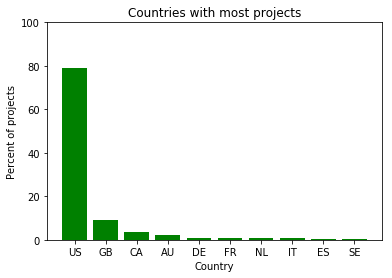

In [22]:
plt.bar(most_projects_countries.index, most_projects_countries['% of projects'].values, color = 'g')
plt.ylim(0, 100)
plt.xlabel('Country')
plt.ylabel('Percent of projects')
plt.title('Countries with most projects')

In [23]:
#We can see that US is further ahed of all other countries
#Lets only take top 3 countries US, GB, CA

most_projects_countries = most_projects_countries.head(3)

In [37]:
#Lets find what % of success hawe these countries
country_success_dic = {}

hist_indicator = 'success'
hist_country = 'US'

mask1 = df['state'].str.contains(hist_indicator)
mask2 = df['country'].str.contains(hist_country)

us_success = df[mask1 & mask2]
us_success_percent = round(len(us_success)/most_projects_countries.iloc[0, 1]*100, 2)
country_success_dic['US'] = us_success_percent




hist_indicator = 'success'
hist_country = 'GB'

mask1 = df['state'].str.contains(hist_indicator)
mask2 = df['country'].str.contains(hist_country)

gb_success = df[mask1 & mask2]
gb_success_percent = round(len(gb_success)/most_projects_countries.iloc[1, 1]*100, 2)
country_success_dic['GB'] = gb_success_percent




hist_indicator = 'success'
hist_country = 'CA'

mask1 = df['state'].str.contains(hist_indicator)
mask2 = df['country'].str.contains(hist_country)

ca_success = df[mask1 & mask2]
ca_success_percent = round(len(ca_success)/most_projects_countries.iloc[2, 1]*100, 2)
country_success_dic['CA'] = ca_success_percent

print(country_success_dic)

{'US': 41.82, 'GB': 40.97, 'CA': 33.42}


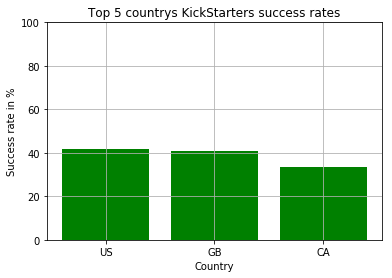

In [38]:
plt.bar(country_success_dic.keys(), country_success_dic.values(), color = 'g')
plt.ylim(0, 100)#Make Y axis 100% insted of 40%
plt.xlabel('Country')
plt.ylabel('Success rate in %')
plt.title('Top 5 countrys KickStarters success rates')
plt.grid(True)
#we can see that US and GB success rates are almost identical

In [44]:
#Lets shrink our df and work only with these 3 countries
US_GB_CA_df = df.query("country in ['US', 'GB', 'CA']")
US_GB_CA_df = US_GB_CA_df.loc[:, ['name', 'category', 'main_category', 'deadline', 
                'usd_goal_real', 'launched', 'state', 'country']]
US_GB_CA_df.shape

(341055, 8)

In [47]:
US_GB_CA_df.rename(columns={'usd_goal_real' : 'goal'}, inplace = True)
US_GB_CA_df.columns

Index(['name', 'category', 'main_category', 'deadline', 'goal', 'launched',
       'state', 'country'],
      dtype='object')

In [48]:
#Lets find 10 amounts of money most often pledged
money_goal = success_rate(df, 'goal').head(10)
money_goal

,% of projects,count
5000.0,7.86,29779
10000.0,6.87,26029
1000.0,4.48,16950
3000.0,4.16,15743
2000.0,4.03,15257
15000.0,3.76,14231
20000.0,3.46,13104
2500.0,3.13,11864
500.0,3.06,11599
25000.0,2.74,10371


Text(0.5, 1.0, 'Most often pledged money amount')

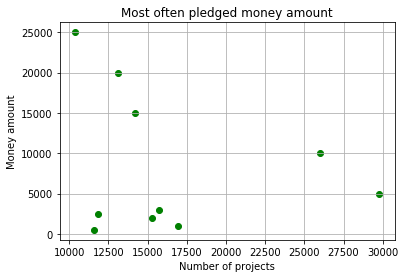

In [75]:
plt.scatter(money_goal['count'], money_goal.index, color = 'g')
plt.grid(True)
plt.xlabel('Number of projects')
plt.ylabel('Money amount')
plt.title('Most often pledged money amount')
# 5000 and 10000 are much more popular amount then others